In [39]:
# load the definitions from the previous notebook
%run HeptagonNumbers.py

<img src="skewHeptagon.png" width=500 height=500 />


$$
\begin{bmatrix}
   \sigma-\rho & 1-\rho
\\ \rho-1      & \rho-1
\end{bmatrix} =
\begin{bmatrix}
   \frac{1}{\sigma}    & \frac{-\sigma}{\rho}
\\ \frac{\sigma}{\rho} & \frac{\sigma}{\rho} 
\end{bmatrix}
$$

In [3]:
r = (0,-1,1)
s = (-1,1,0)
t = (1,-1,0)
u = (-1,1,0)

def scale( s, v ) :
    x, y = v
    return ( times( s, x ), times( s, y ) )

def rotate(v) :
    x, y = v
    return ( plus( times(r,x), times(t,y) ), plus( times(s,x), times(u,y) ) )

def plusv( v1, v2 ) :
    h1, h2 = v1
    h3, h4 = v2
    return ( plus( h1, h3 ), plus( h2, h4 ) )

v0 = ( rho_sigma, zero )
v1 = ( sigma_inv, sigma_inv )

origin = ( zero, zero )


In [4]:
v = v0
for i in range( 15 ):
    v = rotate( v )
    print( v )


((0, 1, 0), (1, 0, 1))
((0, -1, 0), (0, 1, 1))
((0, -1, -1), (0, 1, 0))
((-1, 0, -1), (0, -1, 0))
((0, 0, 0), (0, -1, -1))
((1, 0, 1), (-1, 0, -1))
((0, 1, 1), (0, 0, 0))
((0, 1, 0), (1, 0, 1))
((0, -1, 0), (0, 1, 1))
((0, -1, -1), (0, 1, 0))
((-1, 0, -1), (0, -1, 0))
((0, 0, 0), (0, -1, -1))
((1, 0, 1), (-1, 0, -1))
((0, 1, 1), (0, 0, 0))
((0, 1, 0), (1, 0, 1))


In [24]:
def render( v ):
    x, y = v
    return [ asReal(x), asReal(y) ]


In [41]:
def skewRender(v):
    x = asReal( v[0] )
    y = asReal( v[1] )
    A = math.sin( (3.0/7.0) * math.pi )
    return [ x + y/(2*sigma_value), A*y ]

In [42]:

def heptagonVerts(v,skip=1):
    result = []
    vi = v
    for i in range(7):
        result .append( vi )
        for j in range(skip):
            vi = rotate( vi )
    return result

v0 = ( rho_sigma, zero )
heptagon1 = heptagonVerts( v0 )
heptagon2 = heptagonVerts( plusv( v0, v1 ) )
heptagon3 = heptagonVerts( plusv( plusv( v0, v1 ), v1 ) )
heptagon4 = heptagonVerts( ( neg( rho_sigma ), zero ) )

heptagram1 = heptagonVerts( v0, 2 )
heptagram2 = heptagonVerts( v0, 3 )


Populating the interactive namespace from numpy and matplotlib


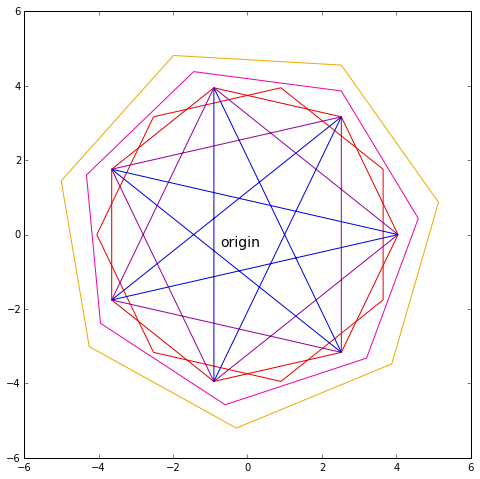

In [56]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
Path = mpath.Path

def drawPolygon( polygonVerts, color, mapping=skewRender ):
    n = len( polygonVerts )
    codes = [ Path.MOVETO ]
    verts = []
    verts .append( mapping( polygonVerts[ 0 ] ) )
    for i in range(1,n+1):
        codes.append ( Path.LINETO )
        verts.append ( mapping( polygonVerts[ i % n ] ) )
    path = mpath.Path( verts, codes )
    return mpatches.PathPatch( path, facecolor='none', edgecolor=color )

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.add_patch( drawPolygon( heptagon1,'#dd0000' ) )
ax.add_patch( drawPolygon( heptagon4,'#ee0000' ) )
ax.add_patch( drawPolygon( heptagon2,'#ee00aa' ) )
ax.add_patch( drawPolygon( heptagon3,'#eeaa00' ) )
ax.add_patch( drawPolygon( heptagram1,'#990099' ) )
ax.add_patch( drawPolygon( heptagram2,'#0000dd' ) )
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
#ax.axis('off')
fig.text(0.5, 0.5,'origin',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=14 )
fig.savefig("order7demo.png")


In [57]:
def ngonPath( edge, n, skip=1, start=origin ):
    result = []
    vi = plusv( start, edge )
    for i in range(n):
        result .append( vi )
        for j in range(skip):
            edge = rotate( edge )
        vi = plusv( vi, edge )
    return result

In [58]:
one_edge = ( sigma, zero )
heptagon_path = ngonPath( one_edge, 7 )

rho_edge = plusv( one_edge, rotate( one_edge ) )
heptagram_rho_path = ngonPath( rho_edge, 7, 2 )

sigma_edge = ( zero, plus( plus( sigma, rho ), one ) )
heptagram_sigma_path = ngonPath( sigma_edge, 7, 4 )

inner_origin = ( plus( sigma, neg( rho) ), rho )
small_edge = ( rho_inv, zero )
small_rho_edge = plusv( small_edge, rotate( small_edge ) )
small_sigma_edge = ( zero, (-1,0,1) )

heptagon_path_shrunk = ngonPath( small_edge, 7, 1, inner_origin )

heptagram_rho_path_shrunk = ngonPath( small_rho_edge, 7, 2, inner_origin )

heptagram_sigma_path_shrunk = ngonPath( small_sigma_edge, 7, 4, inner_origin )


(-2.0, 4.0, -0.20000000000000001, 5.7999999999999998)

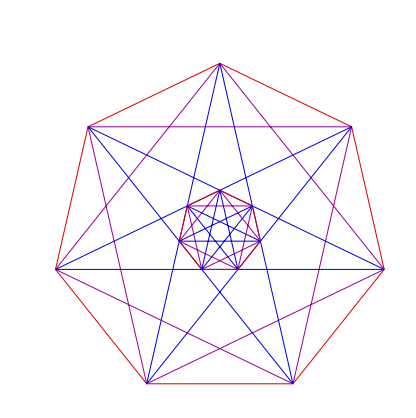

In [60]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.add_patch( drawPolygon( heptagon_path,'#dd0000', skewRender ) )
ax.add_patch( drawPolygon( heptagram_rho_path,'#990099', skewRender ) )
ax.add_patch( drawPolygon( heptagram_sigma_path,'#0000dd', skewRender ) )
ax.add_patch( drawPolygon( heptagon_path_shrunk,'#dd0000', skewRender ) )
ax.add_patch( drawPolygon( heptagram_rho_path_shrunk,'#990099', skewRender ) )
ax.add_patch( drawPolygon( heptagram_sigma_path_shrunk,'#0000dd', skewRender ) )
ax.set_xlim(-2,4)
ax.set_ylim(-0.2,5.8)
ax.axis('off')
#fig.savefig("nestedHeptagrams.png")


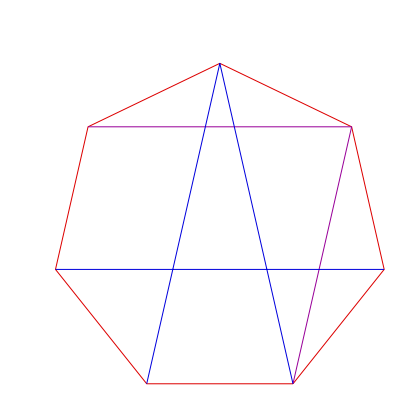

In [61]:
def drawPolygonSubset(polygonVerts,todraw,color, mapping=skewRender):
    n = len( polygonVerts )
    codes = [ Path.MOVETO ]
    verts = []
    verts .append( mapping( polygonVerts[ 0 ] ) )
    for i in range(1,n+1):
        if i in todraw:
            codes.append ( Path.LINETO )
        else:
            codes.append ( Path.MOVETO )
        verts.append ( mapping( polygonVerts[ i % n ] ) )
    path = mpath.Path( verts, codes )
    return mpatches.PathPatch( path, facecolor='none', edgecolor=color )

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.add_patch( drawPolygon( heptagon_path,'#dd0000', skewRender ) )
ax.add_patch( drawPolygonSubset( heptagram_rho_path, set([4,5]), '#990099' ) )
ax.add_patch( drawPolygonSubset( heptagram_sigma_path, set([7,1,4]), '#0000dd' ) )
ax.set_xlim(-2,4)
ax.set_ylim(-0.2,5.8)
ax.axis('off')
fig.savefig("heptagonSimilarTriangles.png")


In [62]:
sigma_real = 1 / (2* math.sin(math.pi/14))
sigma_real

2.246979603717467

In [63]:
rho_real = 2*math.sin(5*math.pi/14)
rho_real

1.8019377358048383

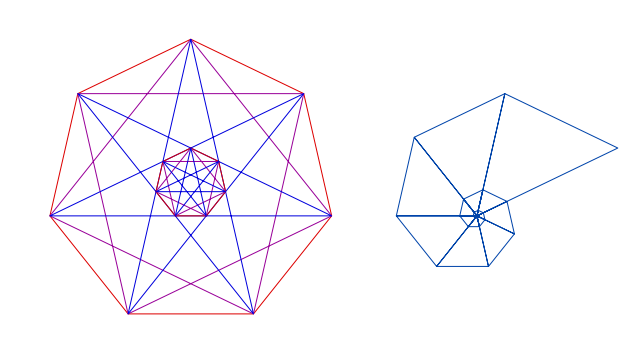

In [74]:

def offset(v):
    x = plus( v[0], (0,2,1) )
    y = plus( v[1], (0,1,0) )
    return (x,y)

def nautilus( n ):
    result = []
    def shrink(v):
        return scale( (-1,1,0), v )
    p1 = ( sigma, (-1,0,1) )
    p2 = ( zero, sigma )
    for i in range(n):
        result .append( offset( origin ) )
        result .append( offset( p1 ) )
        result .append( offset( p2 ) )
        p1 = p2
        p2 = rotate( shrink( p2 ) )
    return result

fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
ax.add_patch( drawPolygon( heptagon_path,'#dd0000' ) )
ax.add_patch( drawPolygon( heptagram_rho_path,'#990099' ) )
ax.add_patch( drawPolygon( heptagram_sigma_path,'#0000dd' ) )
ax.add_patch( drawPolygon( heptagon_path_shrunk,'#dd0000' ) )
ax.add_patch( drawPolygon( heptagram_rho_path_shrunk,'#990099' ) )
ax.add_patch( drawPolygon( heptagram_sigma_path_shrunk,'#0000dd' ) )
ax.add_patch( drawPolygon( nautilus( 22 ), '#0044aa' ) )
ax.set_xlim(-2,9)
ax.set_ylim(-0.5,5.5)
ax.axis('off')
fig.savefig("heptagonSampler.png")
